## Exploración de la magnitud del recall según el número de variables seleccionadas

Finalmente quiero explorar cómo cambia la sensibilidad en train y test a medida en función de las features seleccionadas para nuestro DataFrame.

### Importo las librerías a utilizar

In [1]:
#Para trabajar con mis DataFrames y codificar numéricamente mis features
import pandas as pd

#Para la reducción de dimensiones
from sklearn.decomposition import PCA

#Para separar en train y test
from sklearn.model_selection import train_test_split

#Para números aleatorios
import numpy as np

#Para el RandomForest de clasificación
from sklearn.ensemble import RandomForestClassifier

#Para obtener la métrica recall
from sklearn.metrics import recall_score

#Para graficar
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

#Para dibujar un árbol con mis features seleccionadas
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Fijo el máximo de filas a mostrar a 100 y el de columnas, a 50
pd.options.display.max_rows = 120
pd.options.display.max_columns = 50

### Importo mi DataFrame con 106 features

In [2]:
df_mushroom_largo =  pd.read_csv("../data/df_mushroom_largo.csv")

df_mushroom_largo

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2            True        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False         True        False   
8120        False        False        False        False        False   
8121        False        False         True        False        False   
8122        False        False        False         True        False   
8123        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            True          False          False           True          False   
1            True          False          False           True          False   
2           False          False          False           True          False   
3            True          False          False          False           True   
4            True          False          False           True          False   
...           ...            ...            ...            ...            ...   
8119        False          False          False           True          False   
8120         True          False          False           True          False   
8121        False          False          False           True          False   
8122        False          False          False          False           True   
8123         True          False          False           True          False   

      cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0           False        False        False        False         True   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False         True        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False        False         True   
8120        False        False        False        False         True   
8121        False        False        False        False         True   
8122        False        False        False        False         True   
8123        False        False        False        False         True   

      cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  \
0           False        False        False        False        False   
1           False        False        False        False         True   
2           False        False        False         True        False   
3           False        False        False         True        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False        False        False   
8120        False        False        False        False        False   
8121        False        False        False        False        False   
8122        False        False        False        False        False   
8123        False        False        False        False        False   

      bruises_f  odor_a  odor_c  odor_f  odor_l  ...  ring-type_n  \
0         False   False   False   False   False  ...        False   
1         False    True   False   False   False  ...        False   
2         False   False   False   False    True  ...        False   
3         False   False   False   False   False  ...        False   
4          True   False   False   False   False  ...     

### División en train/test

En primer lugar, divido mis datos en train y test.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_mushroom_largo.drop('class', axis = 1), 
                                                    df_mushroom_largo['class'], 
                                                    test_size = 0.2, #Reservo un 20% de los datos para test
                                                    random_state = 50) #Fijo la semilla por replicabilidad

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6499, 106)
X_test: (1625, 106)
y_train: (6499,)
y_test: (1625,)


## Extracción de la importancia de las features

### features_importances_

Extraigo el features_importances_ (en %) de las columnas del dataset, y las ordeno dejando las más importantes en la parte superior.

In [4]:
#Creo un RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 94) 
#Fijo una semilla para reprodubilidad feature_importances_

#Lo ajusto a mis datos de train
random_forest.fit(X_train, y_train)

#Creo un DataFrame con cada columna y su importancia
feat_importance = pd.DataFrame({'features': X_train.columns, 
                                'feature importances': random_forest.feature_importances_}).set_index('features')*100

#Ordeno las columnas de mayor a menor importancia
feat_importance_orden = feat_importance.sort_values(by = "feature importances", ascending = False)

#Muestro la tabla
feat_importance_orden

feature importances
features                                       
gill-size_b                            9.380543
odor_n                                 8.817495
gill-color_b                           7.535354
spore-print-color_h                    6.338769
odor_f                                 5.861566
stalk-surface-below-ring_k             5.408511
stalk-surface-above-ring_k             4.119893
ring-type_p                            3.756356
bruises_f                              3.719401
population_v                           3.430356
stalk-surface-above-ring_s             3.005004
ring-type_l                            2.964732
odor_p                                 2.070379
spore-print-color_w                    1.931693
gill-spacing_c                         1.817568
stalk-shape_e                          1.561883
spore-print-color_n                    1.548455
odor_c                                 1.290625
spore-print-color_k                    1.252703
habitat_u                              1.250953
ring-type_e                            1.104019
habitat_d                              1.099663
stalk-surface-below-ring_s             0.969930
ring-number_t                          0.928328
stalk-color-above-ring_w               0.870046
habitat_g                              0.831861
cap-surface_f                          0.786509
stalk-color-below-ring_w               0.754056
odor_a                                 0.741299
spore-print-color_r                    0.695961
population_s                           0.677702
odor_l                                 0.676795
ring-number_o                          0.668151
habitat_p                              0.651878
stalk-surface-below-ring_f             0.574565
cap-surface_s                          0.553003
odor_s                                 0.502237
cap-color_y                            0.494714
stalk-surface-above-ring_f             0.444471
gill-color_w                           0.441280
population_a                           0.386500
odor_y                                 0.386096
cap-color_w                            0.355772
population_y                           0.334217
habitat_m                              0.329957
population_n                           0.314690
stalk-color-below-ring_b               0.302063
stalk-surface-below-ring_y             0.296800
cap-color_n                            0.279333
cap-shape_b                            0.255267
cap-color_b                            0.247164
stalk-color-below-ring_o               0.226424
stalk-color-below-ring_p               0.225982
cap-surface_y                          0.221916
stalk-color-above-ring_n               0.202987
gill-color_r                           0.190824
gill-color_h                           0.188762
stalk-color-below-ring_n               0.187476
habitat_l                              0.167948
stalk-color-above-ring_p               0.166946
gill-color_n                           0.160841
stalk-color-above-ring_b               0.155140
cap-color_p                            0.154109
cap-color_e                            0.151993
habitat_w                              0.143345
odor_m                                 0.141793
population_c                           0.140807
cap-color_g                            0.133073
stalk-color-above-ring_g               0.130816
ring-type_f                            0.122582
ring-type_n                            0.121751
gill-attachment_a                      0.117482
cap-shape_x                            0.116652
gill-color_g                           0.110683
cap-shape_f                            0.105622
spore-print-color_u                    0.102035
stalk-color-above-ring_o               0.102012
stalk-color-above-ring_c               0.093769
gill-color_p                           0.074139
ring-number_n                          0.073963
gill-color_u                           0.065859
stalk-color-below-ring_g               0.064

Creo una función que me permita, en base a la posición en la tabla de feature_importances_, seleccionar tantas columnas de mi DataFrame original, como le pida en la función. Con esas columnas calculará el recall en train y test, y repetirá esta operación por cada una de las peticiones de número de columnas. Me devolverá un DataFrame con toda esa información, el cual usaré para graficar.

In [5]:
lista_datos_recall = []

#Defino mi función para calcular la sensibilidad de varios DataFrames
    #en función de un número dado de features

def get_sensibilidad(num_ft_seleccionadas):

    #Tomo, de mi objeto feat_importances_, tantas columnas como indique
    ft_tirar = feat_importance_orden.iloc[num_ft_seleccionadas:].index.tolist()

    #Tiro, de mi DataFrame, las columnas no seleccionadas
    df_mushroom_ft = df_mushroom_largo.drop(ft_tirar, axis = 1)

    #Divido en train/test
    X_train, X_test, y_train, y_test = train_test_split(df_mushroom_ft.drop('class', axis = 1), 
                                                        df_mushroom_ft['class'], 
                                                        test_size = 0.2,
                                                        random_state = 50)
    
    #Calculo la sensibilidad en train y test de un RandomForestClassifier,
    #con el número de columnas seleccionadas
    random_forest = RandomForestClassifier(random_state = 94) 
    random_forest.fit(X_train, y_train)

    #Sensibilidad en train
    y_pred_train = random_forest.predict(X_train)
    random_forest_score_train = recall_score(y_train, y_pred_train)

    #Sensibilidad en test
    y_pred_test = random_forest.predict(X_test)
    random_forest_score_test = recall_score(y_test, y_pred_test)

    #Guardo la información en un diccionario
    dict_recall = {'Número de features': num_ft_seleccionadas,
                   'Recall en train': random_forest_score_train,
                   'Recall en test': random_forest_score_test}
    
    #Agrego ese diccionario a una lista
    lista_datos_recall.append(dict_recall)

    #Creo un DataFrame a patir de dicha lista
    df_recall_num_ft = pd.DataFrame(data = lista_datos_recall, columns = dict_recall.keys()).set_index('Número de features')

    return df_recall_num_ft

In [6]:
#Llamo a mi función para que calcule el recall de una sola feature,
    #y vaya tomando cada vez una feature más y calcule el recall
    #en esos casos

for num in np.arange(1, 107):
    df_recall_num_ft = get_sensibilidad(num)

#Muesto el DataFrame resultante
df_recall_num_ft

Recall en train  Recall en test
Número de features                                 
1                          0.571429        0.554745
2                          0.972527        0.957421
3                          0.972527        0.957421
4                          0.963478        0.947689
5                          0.963478        0.947689
6                          0.963478        0.947689
7                          0.979961        0.968370
8                          0.979961        0.968370
9                          0.981900        0.970803
10                         0.983516        0.974453
11                         0.983516        0.974453
12                         0.983516        0.974453
13                         0.983516        0.974453
14                         0.983516        0.974453
15                         0.983516        0.974453
16                         1.000000        1.000000
17                         1.000000        1.000000
18                         1.000000        1.000000
19                         1.000000        1.000000
20                         1.000000        1.000000
21                         1.000000        1.000000
22                         1.000000        1.000000
23                         1.000000        1.000000
24                         1.000000        1.000000
25                         1.000000        1.000000
26                         1.000000        1.000000
27                         1.000000        1.000000
28                         1.000000        1.000000
29                         1.000000        1.000000
30                         1.000000        1.000000
31                         1.000000        1.000000
32                         1.000000        1.000000
33                         1.000000        1.000000
34                         1.000000        1.000000
35                         1.000000        1.000000
36                         1.000000        1.000000
37                         1.000000        1.000000
38                         1.000000        1.000000
39                         1.000000        1.000000
40                         1.000000        1.000000
41                         1.000000        1.000000
42                         1.000000        1.000000
43                         1.000000        1.000000
44                         1.000000        1.000000
45                         1.000000        1.000000
46                         1.000000        1.000000
47                         1.000000        1.000000
48                         1.000000        1.000000
49                         1.000000        1.000000
50                         1.000000        1.000000
51                         1.000000        1.000000
52                         1.000000        1.000000
53                         1.000000        1.000000
54                         1.000000        1.000000
55                         1.000000        1.000000
56                         1.000000        1.000000
57                         1.000000        1.000000
58                         1.000000        1.000000
59                         1.000000        1.000000
60                         1.000000        1.000000
61                         1.000000        1.000000
62                         1.000000        1.000000
63                         1.000000        1.000000
64                         1.000000        1.000000
65                         1.000000        1.000000
66                         1.000000        1.000000
67                         1.000000        1.000000
68                         1.000000        1.000000
69                         1.000000        1.000000
70                         1.000000        1.000000
71                         1.000000        1.000000
72                         1.000000        1.000000
73                         1.000000        1.000000
74                         1.000000        1.000000
75                         1.000000        1.000000
76              

Represento gráficamente esta información, con ayuda de un gráfico de líneas.

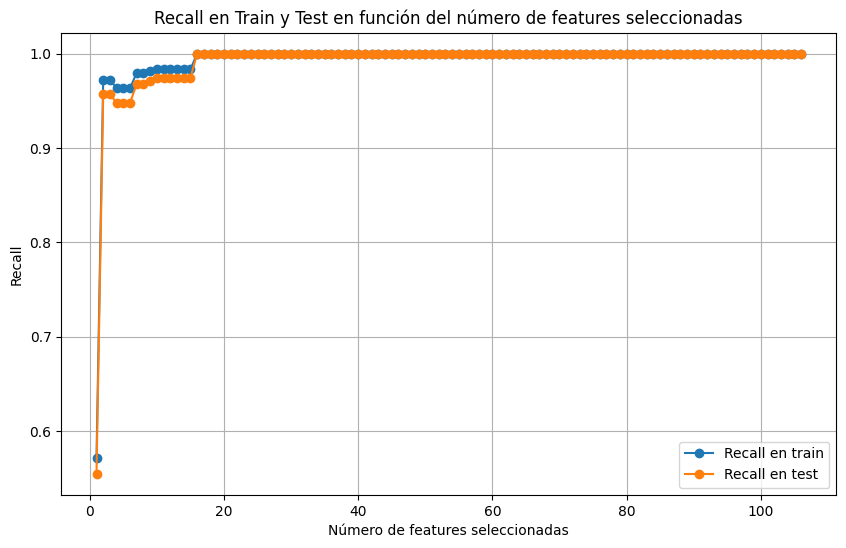

In [7]:
#Defino el tamaño de la figura
plt.figure(figsize=(10, 6))

#La información a representar
plt.plot(df_recall_num_ft.index, df_recall_num_ft['Recall en train'], label='Recall en train', marker='o')
plt.plot(df_recall_num_ft.index, df_recall_num_ft['Recall en test'], label='Recall en test', marker='o')

#Y el etiquetado de los ejes y título
plt.title('Recall en Train y Test en función del número de features seleccionadas')
plt.xlabel('Número de features seleccionadas')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

#Muesto el gráfico
plt.show()

Se puede ver claramente cómo pasa de tener un recall cercano a 0.5, cuando solo se usa una feature, a estar por encima del 90% con dos, hasta que se estabiliza antes de las 20 features. 

Hagamos un zoom desde 2 features hasta 20, para poder apreciarlo mejor:

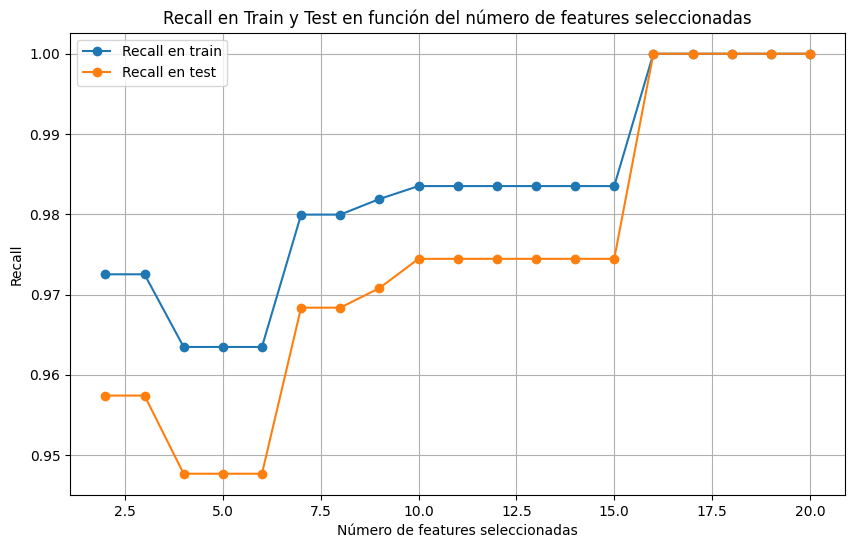

In [8]:
#Selecciono únicamente de la segunda a la vigésima columna
df_recall_num_ft_zoom = df_recall_num_ft.iloc[1:20]

plt.figure(figsize=(10, 6))

plt.plot(df_recall_num_ft_zoom.index, df_recall_num_ft_zoom['Recall en train'], label='Recall en train', marker='o')
plt.plot(df_recall_num_ft_zoom.index, df_recall_num_ft_zoom['Recall en test'], label='Recall en test', marker='o')

plt.title('Recall en Train y Test en función del número de features seleccionadas')
plt.xlabel('Número de features seleccionadas')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.show()

En vista de nuestros datos, podemos llegar a la conclusión de que **únicamente con 16 variables ya seremos capaces de clasificar las setas en comestibles vs venosas con un 100% de acierto** (sensibilidad). Estas 16 variables son:

In [9]:
feat_importance_orden.iloc[:16].index

Index(['gill-size_b', 'odor_n', 'gill-color_b', 'spore-print-color_h',
       'odor_f', 'stalk-surface-below-ring_k', 'stalk-surface-above-ring_k',
       'ring-type_p', 'bruises_f', 'population_v',
       'stalk-surface-above-ring_s', 'ring-type_l', 'odor_p',
       'spore-print-color_w', 'gill-spacing_c', 'stalk-shape_e'],
      dtype='object', name='features')

Vamos a representar estas 16 variables en un árbol de decisión:

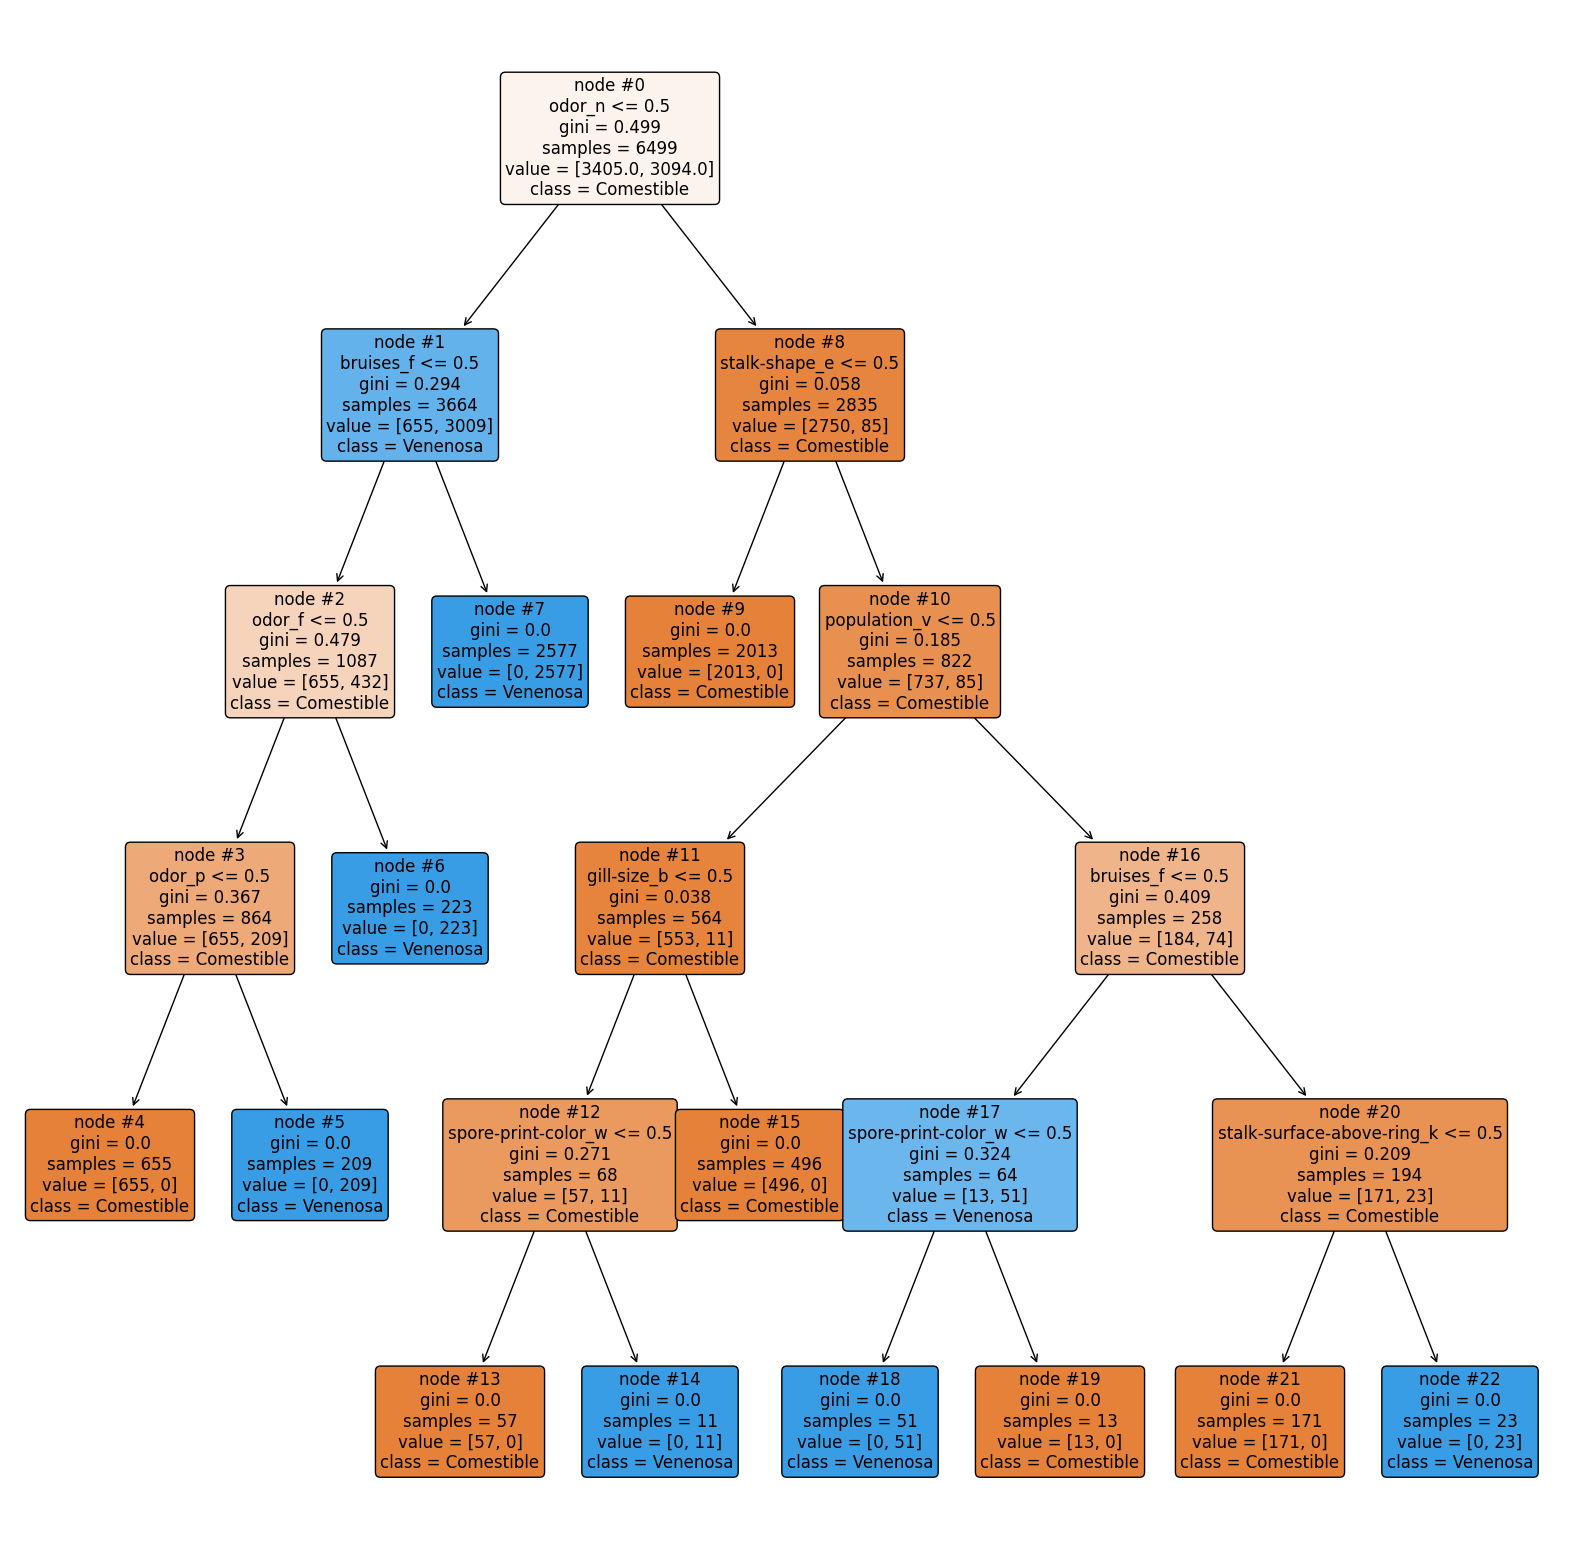

In [10]:
#Creo mi DataFrame únicamente con esas 16 features
ft_tirar = feat_importance_orden.iloc[16:].index.tolist()
df_mushroom_ft = df_mushroom_largo.drop(ft_tirar, axis = 1)

#Divido en train/test
X_train, X_test, y_train, y_test = train_test_split(df_mushroom_ft.drop('class', axis = 1), 
                                                        df_mushroom_ft['class'], 
                                                        test_size = 0.2,
                                                        random_state = 50)

#Creo mi árbol de decisión, fijando la semilla por replicabildad
tree_class = DecisionTreeClassifier(random_state = 404)

#Lo ajusto a mis datos de train
tree_class.fit(X_train, y_train)

#Dibujo el árbol de decisión
plt.figure(figsize=(20,20))
plot_tree(tree_class,
          feature_names = X_train.columns,
          class_names = ["Comestible", "Venenosa"],
          fontsize = 12,
          filled = True,
          node_ids = True,
          rounded = True);

En relación con lo visto en el notebook 3, también puedo representar los datos en 3D tras aplicar un PCA a las 16 features.

In [11]:
#Creo un objeto PCA para reducir las dimensiones de 16 a 3
pca = PCA(n_components = 3, random_state = 44)
X_train_PCA_3D = pca.fit_transform(X_train)

#Imprimo las dimensiones originales y las dimensiones después de PCA
print("Dimensiones originales de X_train:", X_train.shape)
print("Dimensiones de X_train tras PCA con 3D:", X_train_PCA_3D.shape)  

#Defino los colores para mis clases (comestibles en naranja y venenosas en azul)
class_colores = {0: 'orange', 1: 'blue'}
colores = y_train.map(class_colores)

#Defino lso datos de mi scatterplot en 3D
data_scatter3d = go.Scatter3d(x = X_train_PCA_3D[:, 0],
                      y = X_train_PCA_3D[:, 1],
                      z = X_train_PCA_3D[:, 2],
                      mode = 'markers',
                      marker = dict(size = 5, color = colores))

#Defino las etiquetas de los ejes y delimito los márgenes
aspecto_scatter3d = go.Layout(scene = dict(xaxis = dict(title = 'Componente 1'),
                                            yaxis = dict(title = 'Componente 2'),
                                            zaxis = dict(title = 'Componente 3')),
                             margin = dict(l = 0, r = 0, b = 0, t = 0))

#Combino los datos y el aspecto de mi scatter en 3D
fig = go.Figure(data = [data_scatter3d], layout = aspecto_scatter3d)

#Muestro el gráfico
iplot(fig)

Dimensiones originales de X_train: (6499, 16)
Dimensiones de X_train tras PCA con 3D: (6499, 3)
